In [2]:
import numpy as np
import scipy.optimize as sc
import matplotlib.pyplot as plt
import os


In [3]:
Data_names = []

# Method for going through all the data we have, and it fucking works dawg
for (dir_path, dir_names, file_names) in os.walk('./Data_Labday_3/Half-Plate only'):
    for file_name in file_names:
        if file_name.endswith('.txt'): #ensures we grab only the files ending with .txt
            Data_names.append(os.path.join(dir_path, file_name))

In [5]:
time = [] #array for all time data lists
V1 = [] #Same again for votlage readings


for Data_name in Data_names:
    Data = np.loadtxt(Data_name, skiprows=3)
    time.append(np.linspace(0, 10, len(Data[:, 0][0::100])))
    V1.append(Data[:, 1][0::100]) 

C:\Users\hanse\AppData\Local\Temp\ipykernel_14112\3356160690.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Error in callback <function _draw_all_if_interactive at 0x000002654972C860> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

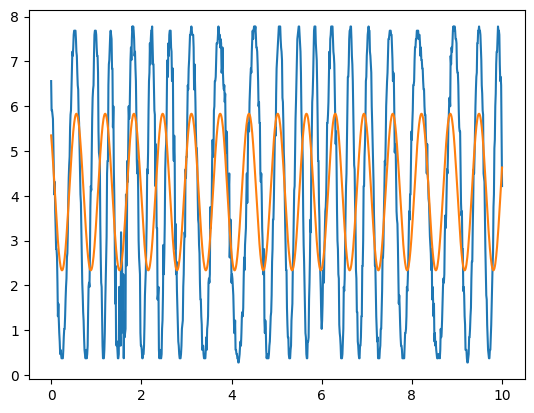

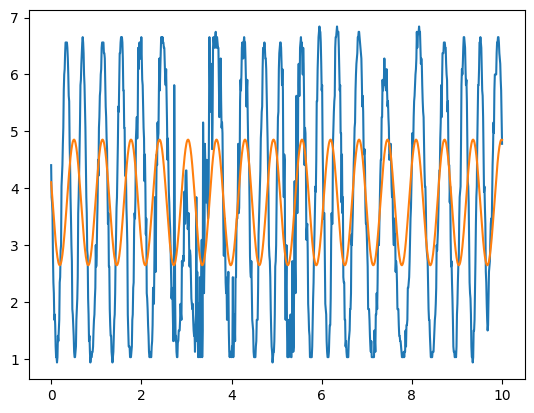

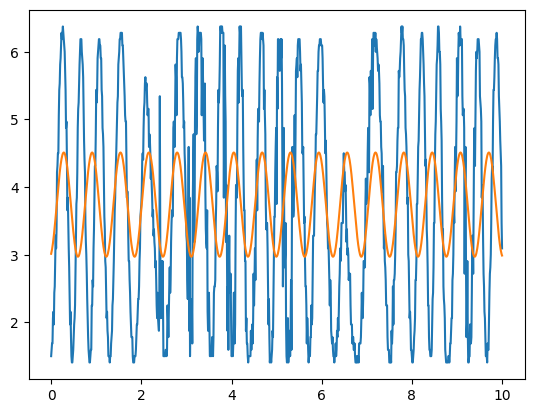

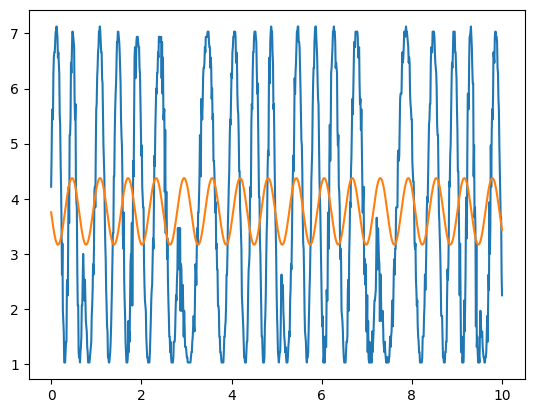

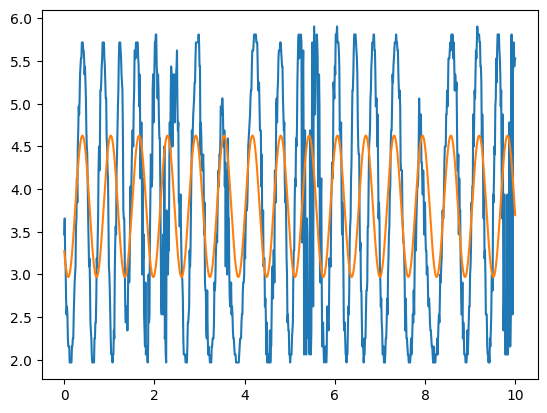

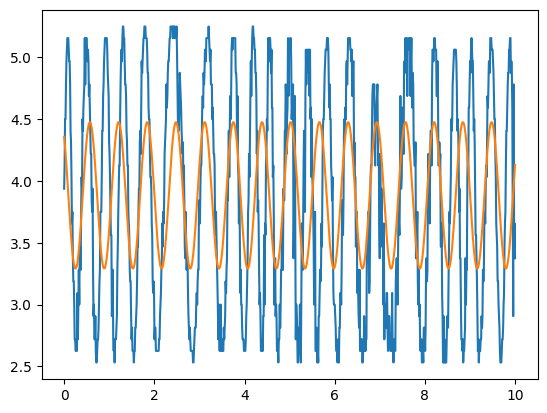

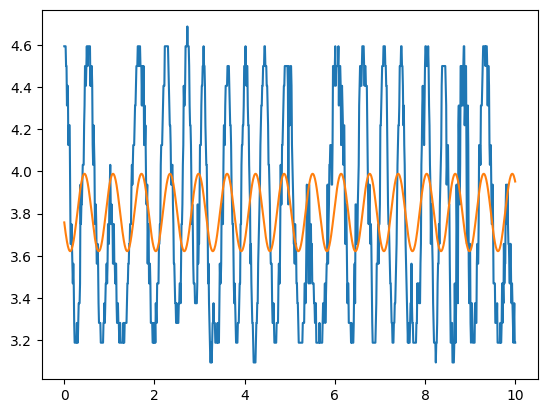

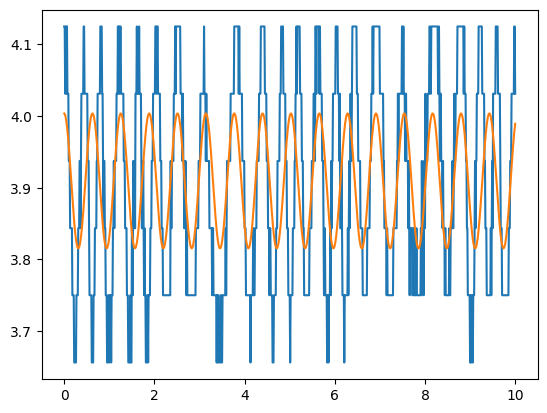

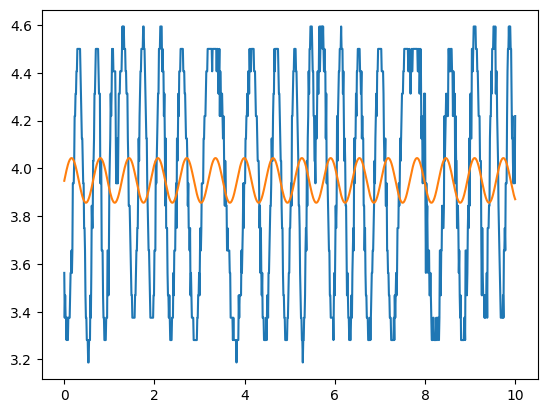

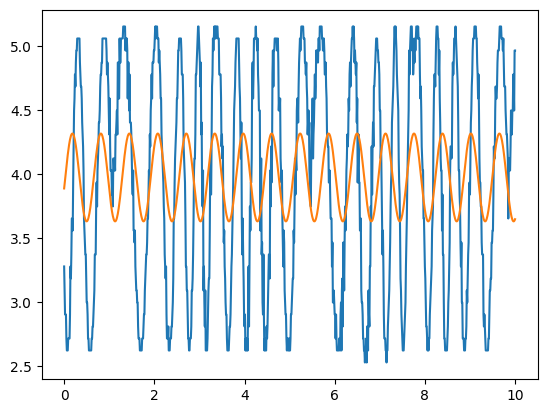

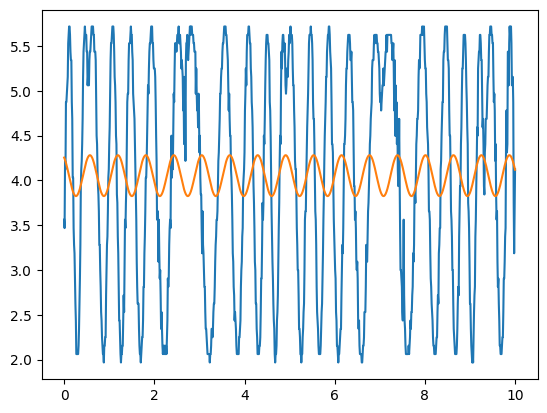

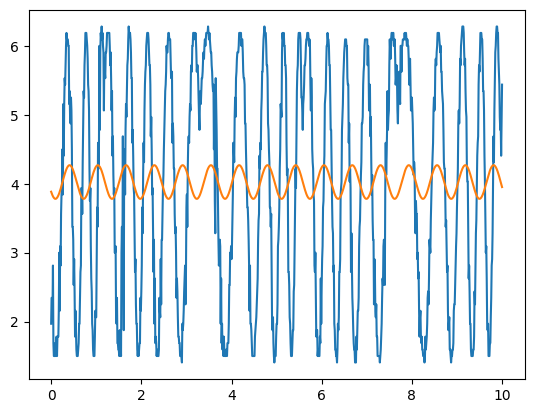

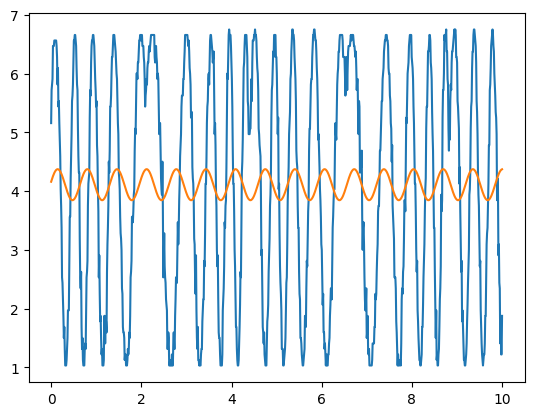

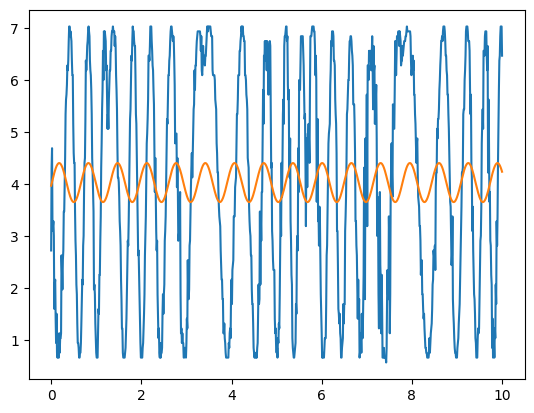

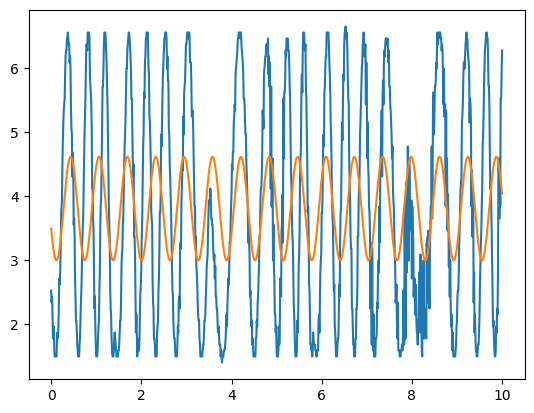

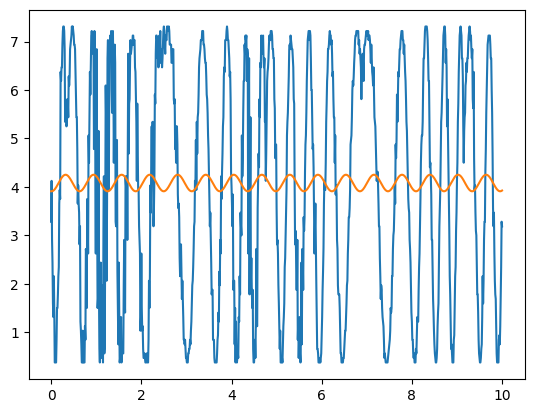

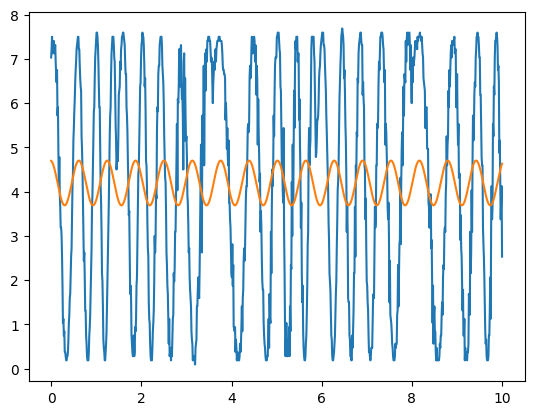

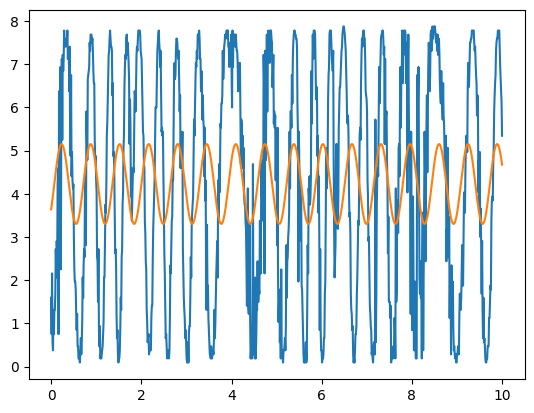

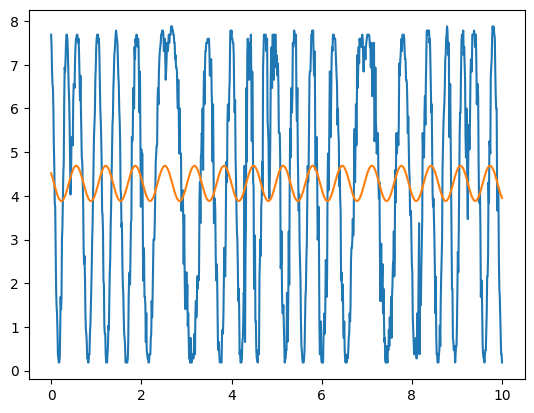

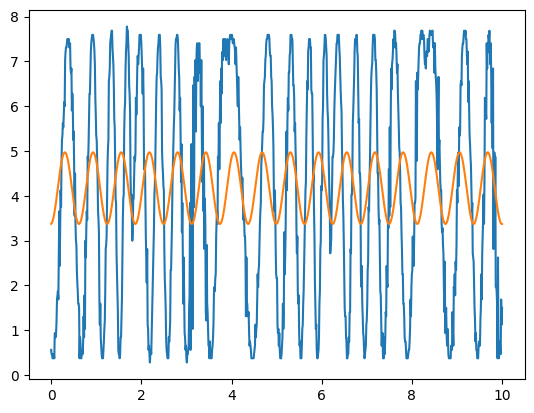

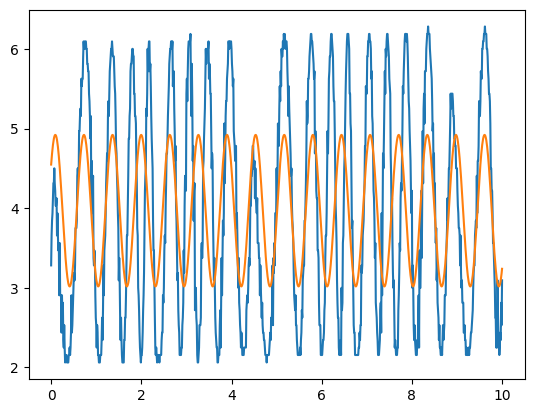

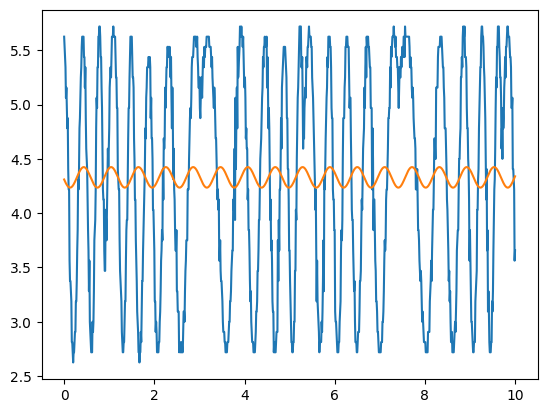

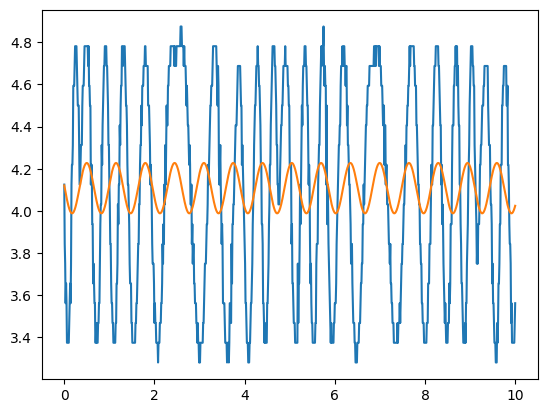

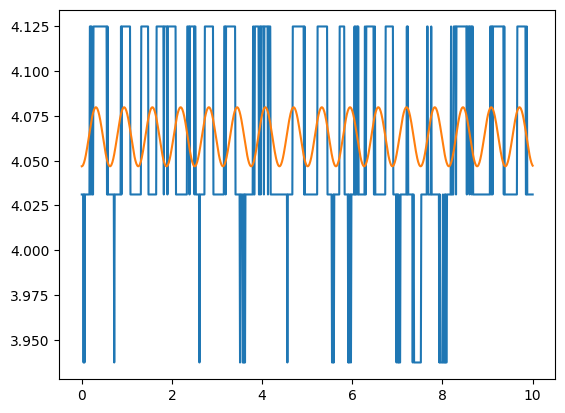

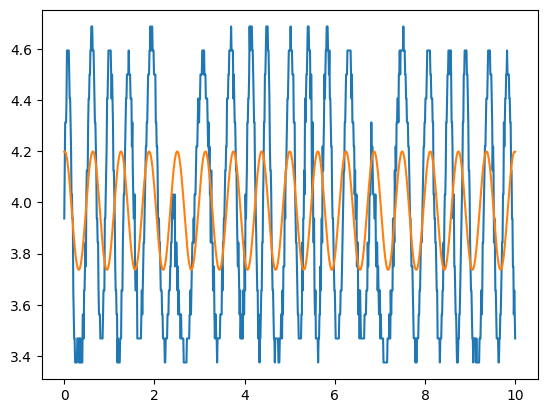

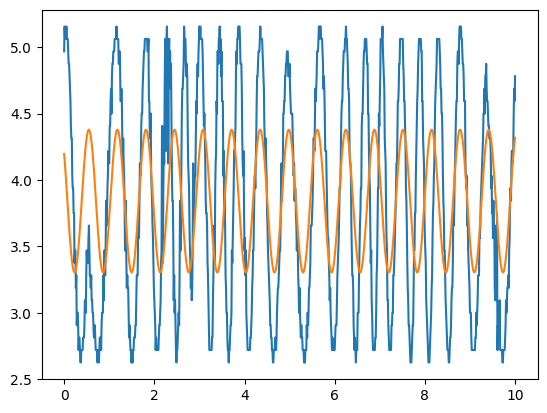

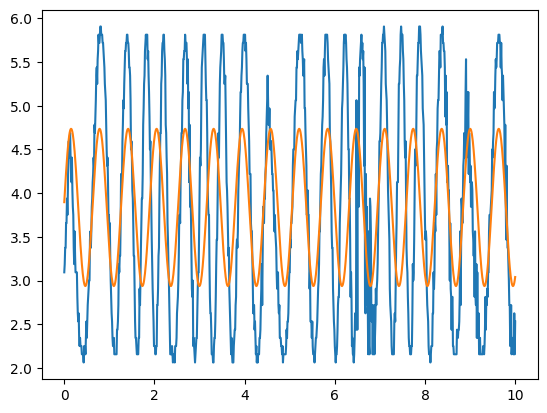

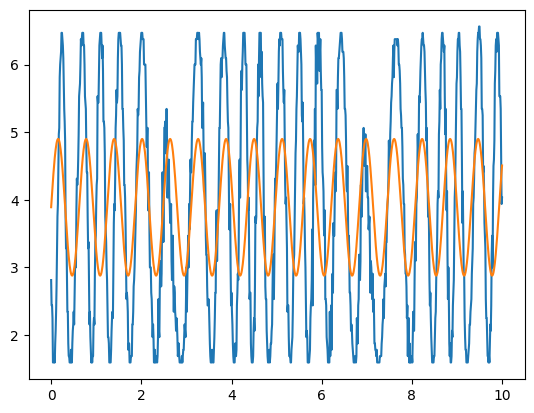

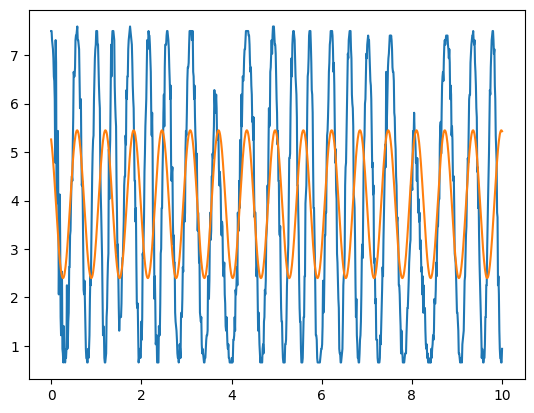

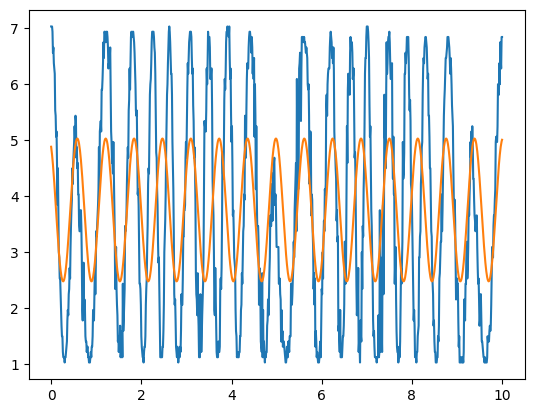

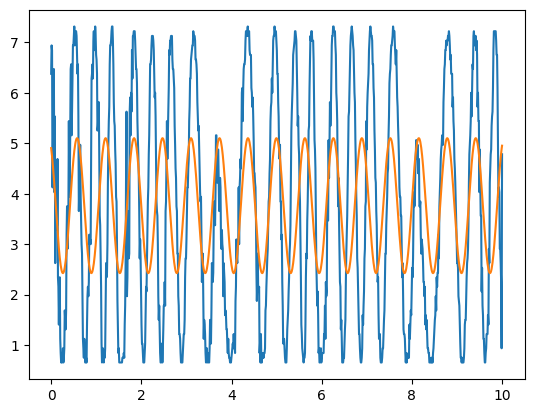

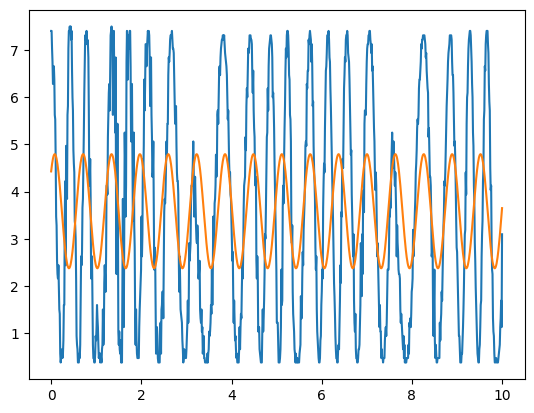

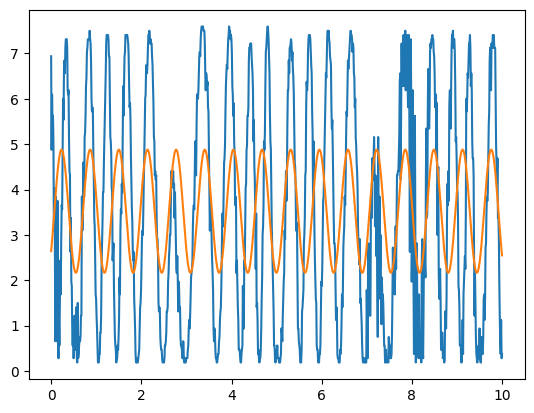

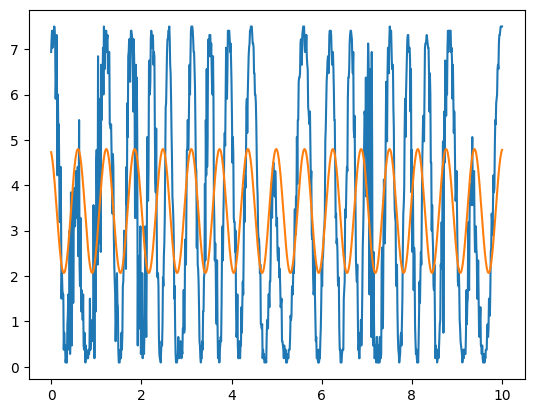

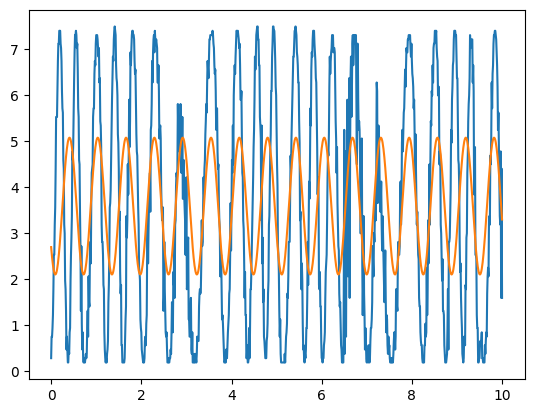

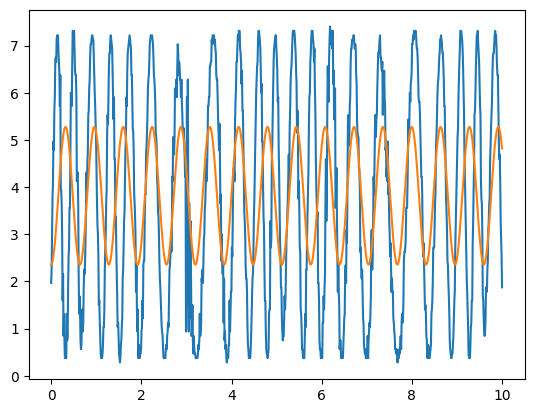

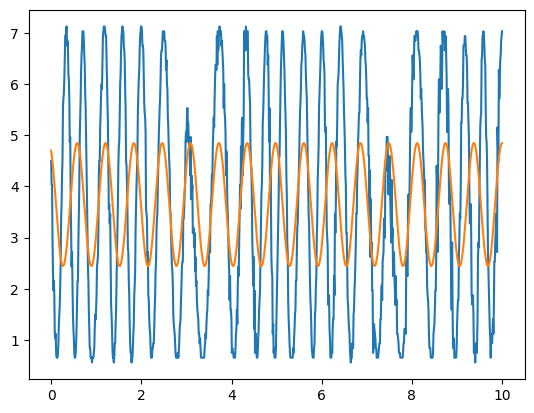

In [7]:
# Fit for each data set
def sine_fit(t, *p):
    amplitude = p[0]
    omega = p[1]
    phi = p[2]
    offset = p[3]
    return amplitude * np.sin(omega * t + phi) + offset

amplitudes_fit = []

for (v, t) in zip(V1, time):
    popt, pcov = sc.curve_fit(sine_fit, t, v, p0 = [max(v) - min(v), 10, 20, 4])
    amplitudes_fit.append(popt[0])
    plt.figure()
    plt.plot(t, v)
    plt.plot(t, sine_fit(t, *popt))
    

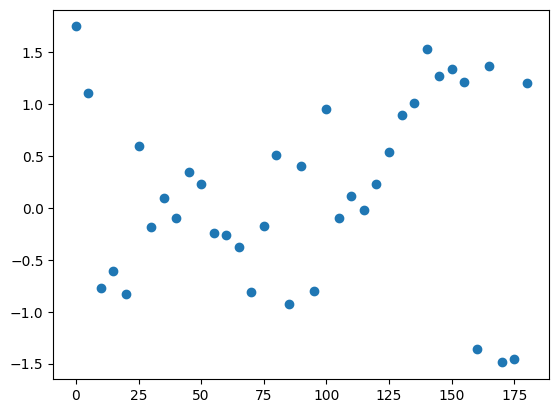

In [ ]:
plt.plot(np.linspace(0, 180, 37), amplitudes_fit, 'o')

Just to look at the data how they look if there is not made a fit

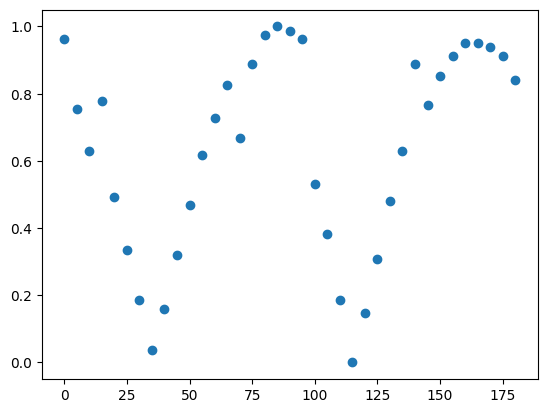

In [8]:
amplitudes = np.array([(max(v) - min(v)) for v in V1])
amplitudes = (amplitudes - amplitudes.min()) / (amplitudes.max() - amplitudes.min())
angles = np.linspace(0, 180, 37)
plt.plot(angles, (amplitudes - amplitudes.min()) / (amplitudes.max() - amplitudes.min()), 'o')

Text(0.5, 1.0, 'Amplitude of Laser at different Half-Plate angles')

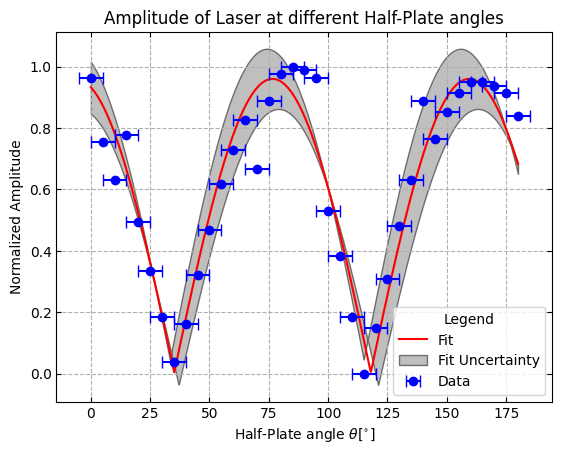

In [18]:
def amp_fit(theta, *p):
    c = p[0]
    a = p[1]
    b = p[2]
    d = p[3]
    return c * abs(np.cos(a * theta + b)) + d

p0 = [1, 0.03, 1.7, 0]
p_opt, p_cov = sc.curve_fit(amp_fit, angles, amplitudes, p0 = p0)

angles_help = np.linspace(0, 180, 1000)
paramter_err = np.sqrt(np.diag(p_cov))

plt.plot(angles_help, amp_fit(angles_help, *p_opt), color = 'red', label = 'Fit')
# plt.plot(angles_help, amp_fit(angles_help, *p0))
plt.errorbar(angles, amplitudes, xerr = 5, fmt = 'o', capsize = 4, color = 'blue', label = 'Data')
plt.fill_between(angles_help, amp_fit(angles_help, p_opt[0] + np.sqrt(p_cov[0][0]), p_opt[1] + np.sqrt(p_cov[1][1]), p_opt[2] + np.sqrt(p_cov[2][2]),
                                        p_opt[3] + np.sqrt(p_cov[3][3])), amp_fit(angles_help, p_opt[0] - np.sqrt(p_cov[0][0]), p_opt[1] - np.sqrt(p_cov[1][1]), 
                                        p_opt[2] - np.sqrt(p_cov[2][2]), p_opt[3] - np.sqrt(p_cov[3][3])), color = 'grey', edgecolor = 'k', alpha = 0.5,
                                        label = 'Fit Uncertainty')

plt.legend(title = 'Legend')
plt.grid(ls = '--')
plt.tick_params(direction = 'in', right = True, top = True)
plt.xlabel(r'Half-Plate angle $\theta [^{\circ}]$')
plt.ylabel(r'Normalized Amplitude')
plt.title('Amplitude of Laser at different Half-Plate angles')

[0.05659607 0.00053795 0.05163941 0.04145157]
